# Trader Behavior Analysis Based on Market Sentiment

This notebook analyzes trader performance by combining historical trade data with the Bitcoin Fear & Greed Index to understand how market sentiment influences profitability, win rate, and risk-taking behavior.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

We load two datasets:
- Trader historical trade data
- Bitcoin Fear & Greed Index data

In [3]:
trader_df = pd.read_csv(
    '/content/drive/MyDrive/ds_shreya_gautam/csv_files/trader_data.csv'
)

sentiment_df = pd.read_csv(
    '/content/drive/MyDrive/ds_shreya_gautam/csv_files/fear_greed.csv'
)

In [4]:
trader_df.head()
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
trader_df.info()
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [6]:
trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

## Data Preprocessing

Timestamps are converted to a uniform datetime format, and daily trade dates are extracted to allow merging with daily sentiment data.

In [7]:
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'])

In [8]:
trader_df['trade_date'] = trader_df['Timestamp'].dt.date

In [9]:
trader_df[['Timestamp', 'trade_date']].head()

,Timestamp,trade_date
0,1970-01-01 00:28:50,1970-01-01
1,1970-01-01 00:28:50,1970-01-01
2,1970-01-01 00:28:50,1970-01-01
3,1970-01-01 00:28:50,1970-01-01
4,1970-01-01 00:28:50,1970-01-01


In [10]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [11]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['sent_date'] = sentiment_df['date'].dt.date

In [12]:
sentiment_df[['date', 'sent_date', 'classification']].head()

,date,sent_date,classification
0,2018-02-01,2018-02-01,Fear
1,2018-02-02,2018-02-02,Extreme Fear
2,2018-02-03,2018-02-03,Fear
3,2018-02-04,2018-02-04,Extreme Fear
4,2018-02-05,2018-02-05,Extreme Fear


## Data Merging

Trader data is merged with market sentiment data using the trade date to analyze sentiment-driven trading behavior.

In [13]:
merged_df = trader_df.merge(
    sentiment_df,
    left_on='trade_date',
    right_on='sent_date',
    how='left'
)

In [14]:
merged_df[['trade_date', 'classification']].head()

,trade_date,classification
0,1970-01-01,NaN
1,1970-01-01,NaN
2,1970-01-01,NaN
3,1970-01-01,NaN
4,1970-01-01,NaN


In [15]:
trader_df['trade_date'].min(), trader_df['trade_date'].max()

(datetime.date(1970, 1, 1), datetime.date(1970, 1, 1))

In [16]:
sentiment_df['sent_date'].min(), sentiment_df['sent_date'].max()

(datetime.date(2018, 2, 1), datetime.date(2025, 5, 2))

In [17]:
# reload trader_df fresh (important)
trader_df = pd.read_csv(
    '/content/drive/MyDrive/ds_shreya_gautam/csv_files/trader_data.csv'
)

In [18]:
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], unit='ms')

In [19]:
trader_df['trade_date'] = trader_df['Timestamp'].dt.date

In [20]:
trader_df[['Timestamp', 'trade_date']].head()
trader_df['trade_date'].min(), trader_df['trade_date'].max()

(datetime.date(2023, 3, 28), datetime.date(2025, 6, 15))

In [21]:
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s')
sentiment_df['sent_date'] = sentiment_df['timestamp'].dt.date

In [22]:
sentiment_df['sent_date'].min(), sentiment_df['sent_date'].max()

(datetime.date(2018, 2, 1), datetime.date(2025, 5, 2))

In [23]:
merged_df = trader_df.merge(
    sentiment_df[['sent_date', 'classification']],
    left_on='trade_date',
    right_on='sent_date',
    how='left'
)

In [24]:
merged_df[['trade_date', 'classification']].head(10)

,trade_date,classification
0,2024-10-27,Greed
1,2024-10-27,Greed
2,2024-10-27,Greed
3,2024-10-27,Greed
4,2024-10-27,Greed
5,2024-10-27,Greed
6,2024-10-27,Greed
7,2024-10-27,Greed
8,2024-10-27,Greed
9,2024-10-27,Greed


In [25]:
merged_df['classification'].value_counts()

,count
classification,
Fear,133871
Greed,36289
Neutral,7141
Extreme Greed,6962


In [26]:
# FIX FOR ALL RED ERRORS

merged_df.rename(columns={
    'Closed PnL': 'closed_pnl',
    'Execution Price': 'execution_price',
    'Size USD': 'size_usd',
    'Size Tokens': 'size_tokens'
}, inplace=True)

## Exploratory Data Analysis

We analyze average profitability, win rates, and trade sizes across different market sentiment categories.

In [27]:
merged_df.groupby('classification')['closed_pnl'].mean().sort_values()

,closed_pnl
classification,
Neutral,22.229713
Extreme Greed,25.418772
Fear,50.047622
Greed,87.894859


In [28]:
merged_df.columns


Index(['Account', 'Coin', 'execution_price', 'size_tokens', 'size_usd', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'closed_pnl',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'trade_date', 'sent_date', 'classification'],
      dtype='object')

In [29]:
merged_df.groupby('classification')['closed_pnl'].median()

,closed_pnl
classification,
Extreme Greed,0.0
Fear,0.0
Greed,0.0
Neutral,0.0


In [30]:
merged_df['win'] = merged_df['closed_pnl'] > 0
merged_df.groupby('classification')['win'].mean()

,win
classification,
Extreme Greed,0.490089
Fear,0.415146
Greed,0.446471
Neutral,0.317182


In [31]:
merged_df.groupby('classification')['size_usd'].mean()

,size_usd
classification,
Extreme Greed,5660.265764
Fear,5259.977837
Greed,3182.883845
Neutral,3058.848110


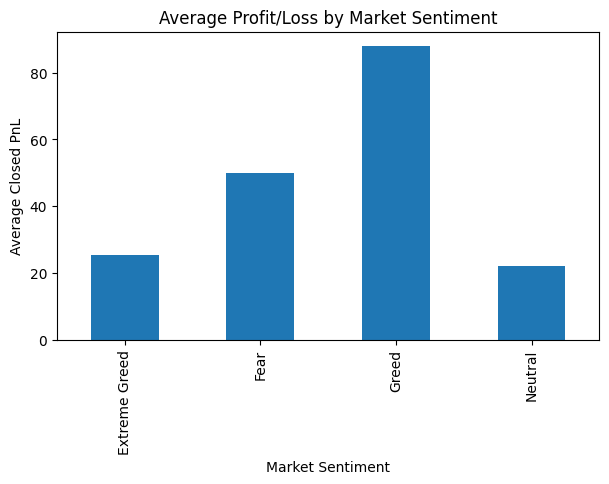

In [32]:
merged_df.groupby('classification')['closed_pnl'].mean().plot(
    kind='bar',
    title='Average Profit/Loss by Market Sentiment',
    ylabel='Average Closed PnL',
    xlabel='Market Sentiment',
    figsize=(7,4)
)

plt.savefig('avg_pnl_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

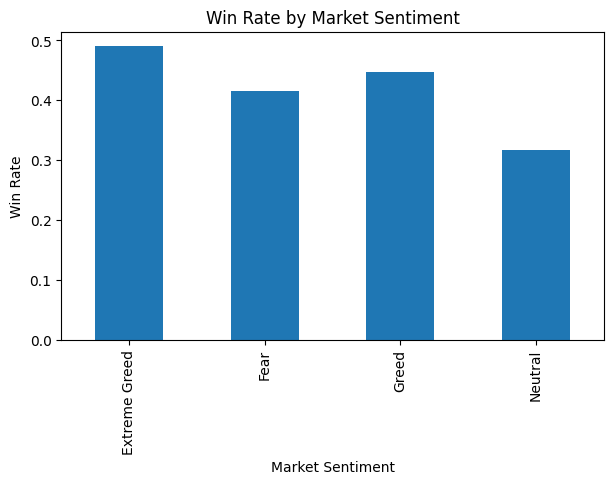

In [33]:
merged_df.groupby('classification')['win'].mean().plot(
    kind='bar',
    title='Win Rate by Market Sentiment',
    ylabel='Win Rate',
    xlabel='Market Sentiment',
    figsize=(7,4)
)

plt.savefig('win_rate_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

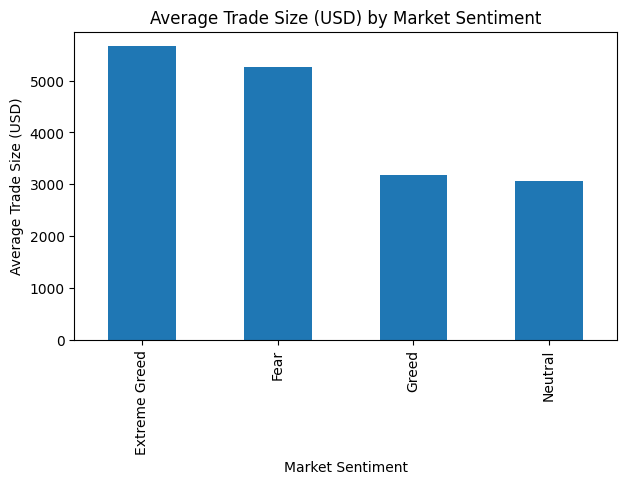

In [34]:
merged_df.groupby('classification')['size_usd'].mean().plot(
    kind='bar',
    title='Average Trade Size (USD) by Market Sentiment',
    ylabel='Average Trade Size (USD)',
    xlabel='Market Sentiment',
    figsize=(7,4)
)

plt.savefig('trade_size_by_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

## Key Findings

- Traders are most profitable during Greed periods  
- Win rates peak during Extreme Greed  
- Neutral sentiment results in the weakest performance  
- Median PnL is zero, indicating a skewed profit distribution

## Conclusion

Market sentiment plays a significant role in shaping trader behavior. Emotion-driven market phases encourage higher risk-taking and profitability, while neutral conditions lead to lower engagement and weaker performance.